# 使multilingual-bert-base进行测试

In [21]:
from sentence_transformers import SentenceTransformer
sentences = ["This is an example sentence", "这是一个示例句子"]

model = SentenceTransformer("C:\\Users\\54758\\bert\\bert-base-multilingual-uncased")
embeddings = model.encode(sentences)
print(embeddings)


[[ 9.50729921e-02 -1.32071465e-01  6.21902384e-03 -3.48530710e-04
  -1.04318179e-01  2.84536718e-03 -4.44578156e-02 -1.69273853e-01
   1.68394580e-01  4.23621684e-02 -1.94324162e-02  1.39500022e-01
   3.10329124e-02  1.84412412e-02 -1.65711164e-01  1.80401966e-01
  -4.39255908e-02 -1.58139393e-01 -3.01444884e-02 -6.52569309e-02
  -6.47174940e-02  1.13563225e-01 -8.31175074e-02  5.03902808e-02
   2.39156894e-02 -6.03592908e-03  1.30615473e-01 -8.39399323e-02
   5.61161973e-02 -4.49363254e-02  1.48620829e-01  5.90775833e-02
   1.85160950e-01  6.10804111e-02 -6.79916814e-02  2.50981271e-01
   1.45402372e-01  1.15647420e-01  1.33657530e-01  7.13731423e-02
   3.48862819e-02 -1.42472923e-01  1.60415635e-01 -4.50152308e-02
  -8.58888477e-02  9.23493877e-02  9.57297012e-02 -7.30991364e-02
  -6.20539626e-03 -2.30953217e-01  1.08344080e-02  2.21018568e-01
  -6.96504861e-02 -5.19560240e-02 -2.02554524e-01 -1.14756957e-01
   2.12529600e-02 -1.24417134e-01 -7.62421414e-02 -4.10297774e-02
  -1.79985

In [22]:
embeddings.shape

(2, 256)

In [23]:
import numpy as np
A = embeddings[0]
B = embeddings[1]
dot_product = np.dot(A, B)
norm_A = np.linalg.norm(A)
norm_B = np.linalg.norm(B)
# 计算余弦相似度
cosine_similarity = dot_product / (norm_A * norm_B)
print("余弦相似度:", cosine_similarity)

余弦相似度: 0.6221687


In [16]:
sentences = [" sentence", "句子"]

# 效果似乎不太好，不同语言的对齐效果很低，调用其他模型


## chinese-Roberta


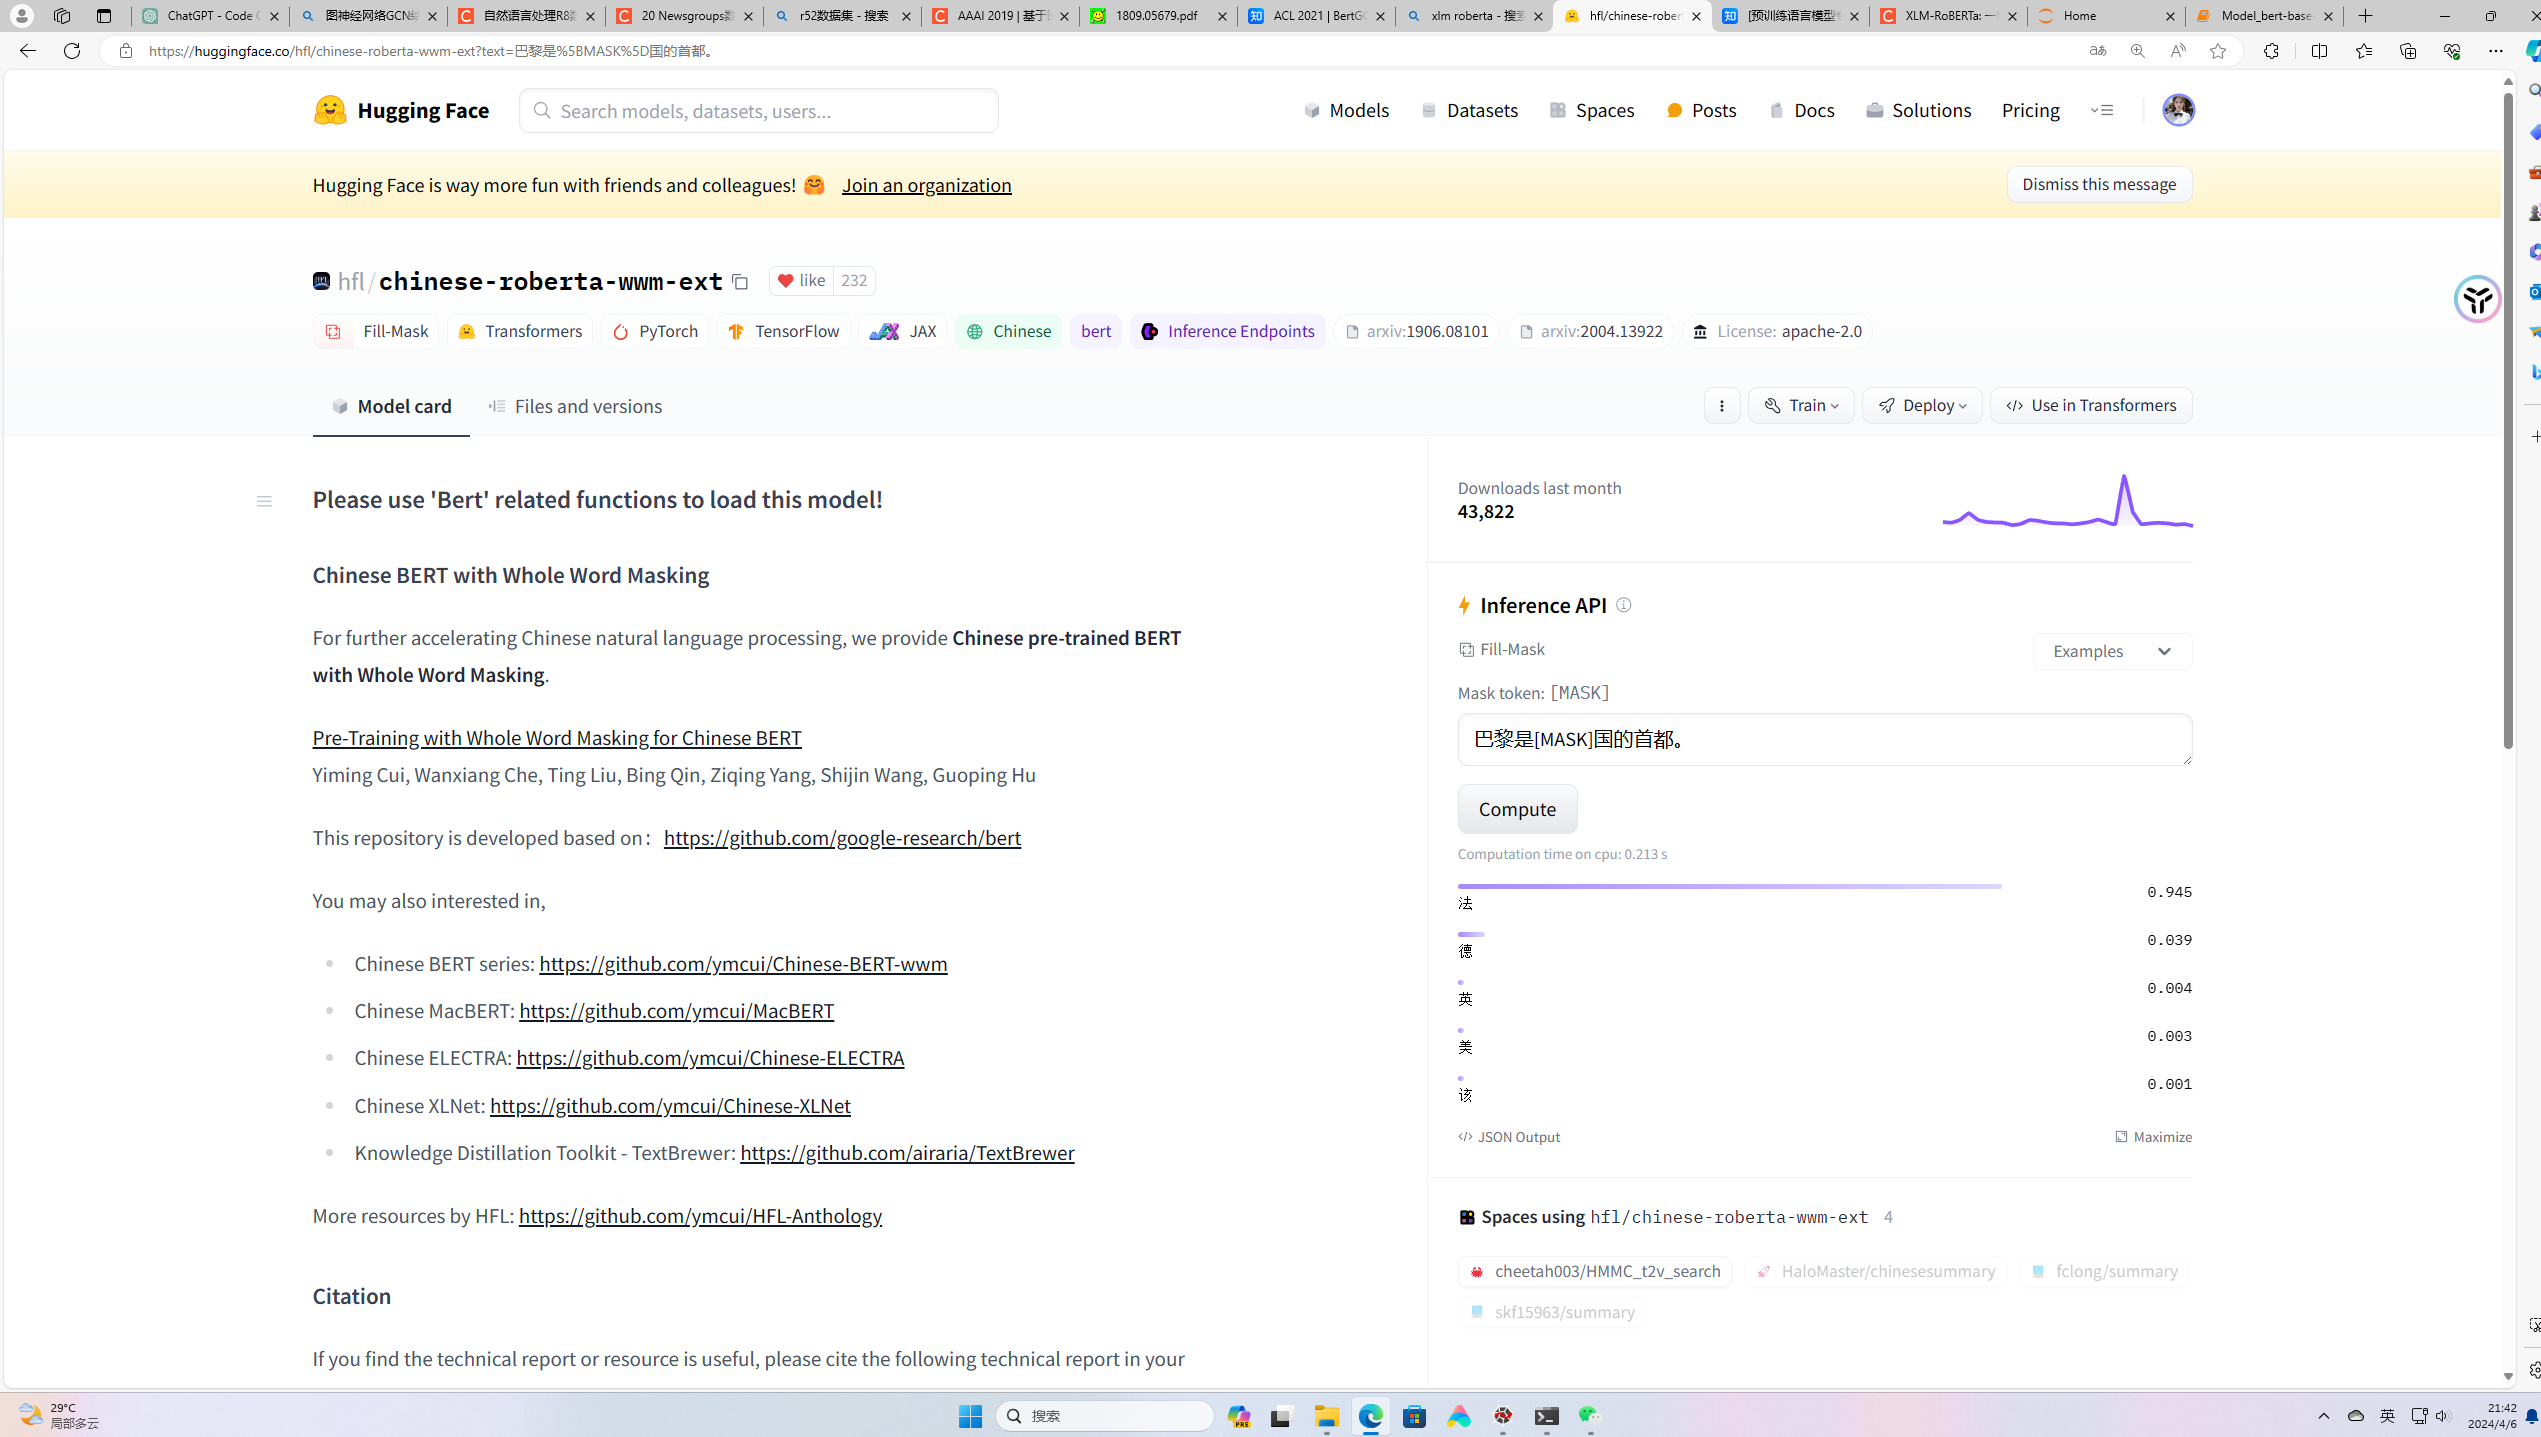

In [8]:
from IPython.display import Image
Image(filename=r"C:\Users\54758\Pictures\111.png",width=1000,height=1000)

In [24]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification
from torch.utils.data import DataLoader, Dataset
import torch

In [10]:
#model = SentenceTransformer("C:\\Users\\54758\\bert\\chinese-roberta-wwm-ext")

In [25]:
from transformers import BertTokenizer, BertModel
import torch
 
tokenizer = BertTokenizer.from_pretrained('C:\\Users\\54758\\bert\\chinese-roberta-wwm-ext')
model = BertModel.from_pretrained('C:\\Users\\54758\\bert\\chinese-roberta-wwm-ext')

Some weights of the model checkpoint at C:\Users\54758\bert\chinese-roberta-wwm-ext were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


句子级别的余弦相似度

In [26]:
import torch
import torch.nn.functional as F
encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt', max_length=128)

with torch.no_grad():
    model_output = model(**encoded_input)

sentence_embeddings = model_output.last_hidden_state[:, 0, :]
cosine_sim = F.cosine_similarity(sentence_embeddings[0].unsqueeze(0), sentence_embeddings[1].unsqueeze(0))

print("余弦相似度:", cosine_sim.item())


余弦相似度: 0.8700018525123596


# XLM-roberta

In [2]:
from transformers import XLMRobertaModel, XLMRobertaTokenizer

tokenizer = XLMRobertaTokenizer.from_pretrained('C:\\Users\\54758\\bert\\xlm-roberta')
model = XLMRobertaModel.from_pretrained('C:\\Users\\54758\\bert\\xlm-roberta')


Some weights of the model checkpoint at C:\Users\54758\bert\xlm-roberta were not used when initializing XLMRobertaModel: ['lm_head.dense.weight', 'lm_head.bias', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.layer_norm.bias']
- This IS expected if you are initializing XLMRobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [3]:
sentences = ["This is an example sentence", "这是一个示例句子"]

In [5]:
# sentences = [" sentence", "句子"]

In [6]:
import torch
import torch.nn.functional as F
encoded_input = tokenizer(sentences, padding=True, truncation=True, return_tensors='pt', max_length=128)

with torch.no_grad():
    model_output = model(**encoded_input)

sentence_embeddings = model_output.last_hidden_state[:, 0, :]
cosine_sim = F.cosine_similarity(sentence_embeddings[0].unsqueeze(0), sentence_embeddings[1].unsqueeze(0))

print("余弦相似度:", cosine_sim.item())


余弦相似度: 0.9995716214179993


查看在更大的翻译数据集上的表现

加载中英文翻译数据集

In [9]:
text_file = r"A:\英中机器文本翻译\ai_challenger_translation_train_20170904\ai_challenger_translation_train_20170904\translation_train_data_20170904\train.en"

In [10]:
with open(text_file,encoding="utf-8") as f:
    lines = f.read().split("\n")[:-1]

In [11]:
lines

['A pair of red - crowned cranes have staked out their nesting territory',
 'A pair of crows had come to nest on our roof as if they had come for Lhamo.',
 "A couple of boys driving around in daddy's car.",
 'A pair of nines? You pushed in with a pair of nines?',
 'Fighting two against one is never ideal,',
 "It's a neat one - two. Walker to Burton.",
 'Deuces the winner.',
 'Five on one. Five on one. Yeah, not the greatest odds.',
 'An incredibly emotional fight between 2 sisters？',
 'One against 500.',
 'Pair of fives, the winner.',
 "America's brother and sister darlings,",
 'A couple, administering a lethal aphrodisiac to satisfy their desires.',
 'A couple of what?',
 "Couple of what? Who's buddy?",
 "Couple of what, I don't know!",
 'A couple? What the fuck does that mean?',
 'Into a convincing married couple.',
 'A bunch of fellas sitting in the middle of this field.',
 'About this rich couple in this townhouse,',
 'Couple of corn - fed, football loving Methodists.',
 'A pair of

In [12]:
len(lines)#英文句子语料长度为1000万

10000000

In [13]:
text_file2 = r"A:\英中机器文本翻译\ai_challenger_translation_train_20170904\ai_challenger_translation_train_20170904\translation_train_data_20170904\train.zh"

In [14]:
with open(text_file2,encoding="utf-8") as f:
    lines2 = f.read().split("\n")[:-1]

In [15]:
lines2

['一对丹顶鹤正监视着它们的筑巢领地',
 '一对乌鸦飞到我们屋顶上的巢里，它们好像专门为拉木而来的。',
 '一对乖乖仔开着老爸的车子。',
 '一对九？一对九你就全下注了？',
 '一对二总不是好事，',
 '一对二，沃克传给波顿。',
 '一对二胜。',
 '一对五。一对五。胜算不大啊。',
 '一对五年没见过的姐妹一场激烈的争吵？',
 '一对五百诶。',
 '一对五胜。',
 '一对亲密的美国兄妹，',
 '一对人用致命的春药满足欲望。',
 '一对什么？',
 '一对什么？哥们儿是谁？',
 '一对什么，我并不知道！',
 '一对？他妈的什么意思？',
 '一对令人信服的已婚夫妇。',
 '一对伙计们坐在战场上。',
 '一对住在别墅里的有钱夫妇，',
 '一对体格健壮热爱橄榄球的卫理公会教徒。',
 '一对俄国迫击炮，那箱子看起来像是美国的步枪。',
 '一对俄国迫击炮，那箱子看起来像是美国的步枪。',
 '一对俏臀就像奶油胡桃冰淇淋。',
 '一对俪人今天晚上就会敲定了。',
 '一对倒霉的情侣？或者最好只是朋友。',
 '一对假的女同性恋到纽约东区出席一名共和党员的晚宴。',
 '一对假结婚的夫妇',
 '一对健康的肾脏市价五万块。',
 '一对偷情男女最后见过死去的丈夫？',
 '一对傻瓜。',
 '一对傻瓜脑子里总想着偷魔法。',
 '一对儿年轻男女将要携手共渡人生旅程。',
 '为了成功的关系。我为你担心，小朋友。',
 '一对儿，我们应该保持距离。',
 '一对儿渔民夫妇发现他被冲到了沙滩上。',
 '一对儿窝囊废。',
 '一对儿童鱼竿。',
 '一对儿老同学？',
 '一对兄妹.',
 '一对兄妹。一对成年的兄妹。',
 '一对兄妹。 在我搜查这条船之时我不会发现他们的，对吧？',
 '一对兄弟犯了戒。',
 '一对冷血杀手走在人群中竟然没被出来。',
 '一对准备分居的夫妻',
 '一对凶恶的猴子。',
 '一对出名的同游表演者',
 '一对加冰块而不加水的下流睾丸。',
 '一对化合物',
 '一对单身的母女。',
 '一对双子星，一个是蓝色的，一个是黄色的。石头和黄金。',
 '一对双胞胎。',
 '一对双胞胎女孩。',
 '一对双胞胎妓女给他做的证。',
 '一对双胞胎正等待父母回家她们玩得很融洽。',
 '可悲的四十出头的室友

# 在更多的数据上测试XLM-roberta

In [16]:
import torch
import torch.nn.functional as F

# 假设 chinese_sentences 和 english_sentences 分别是中文和英文句子列表
chinese_sentences = lines2[:1000]
english_sentences =lines[:1000]

# 确保两个列表长度相同
assert len(chinese_sentences) == len(english_sentences)

cosine_similarities = []
for chinese_sentence, english_sentence in zip(chinese_sentences, english_sentences):
    encoded_chinese = tokenizer(chinese_sentence, padding=True, truncation=True, return_tensors='pt', max_length=128)
    encoded_english = tokenizer(english_sentence, padding=True, truncation=True, return_tensors='pt', max_length=128)

    with torch.no_grad():
        chinese_output = model(**encoded_chinese)
        english_output = model(**encoded_english)

    # 提取[CLS]标记的嵌入作为句子嵌入
    chinese_embedding = chinese_output.last_hidden_state[:, 0, :]
    english_embedding = english_output.last_hidden_state[:, 0, :]

    cosine_sim = F.cosine_similarity(chinese_embedding, english_embedding).item()
    cosine_similarities.append(cosine_sim)

    print(f"中文: {chinese_sentence} - 英文: {english_sentence} 的余弦相似度: {cosine_sim}")

# 计算所有句子对相似度的平均值
average_cosine_sim = sum(cosine_similarities) / len(cosine_similarities)
print(f"平均余弦相似度: {average_cosine_sim}")


中文: 一对丹顶鹤正监视着它们的筑巢领地 - 英文: A pair of red - crowned cranes have staked out their nesting territory 的余弦相似度: 0.9992306232452393
中文: 一对乌鸦飞到我们屋顶上的巢里，它们好像专门为拉木而来的。 - 英文: A pair of crows had come to nest on our roof as if they had come for Lhamo. 的余弦相似度: 0.9995347857475281
中文: 一对乖乖仔开着老爸的车子。 - 英文: A couple of boys driving around in daddy's car. 的余弦相似度: 0.9994171261787415
中文: 一对九？一对九你就全下注了？ - 英文: A pair of nines? You pushed in with a pair of nines? 的余弦相似度: 0.9985902309417725
中文: 一对二总不是好事， - 英文: Fighting two against one is never ideal, 的余弦相似度: 0.9988468289375305
中文: 一对二，沃克传给波顿。 - 英文: It's a neat one - two. Walker to Burton. 的余弦相似度: 0.9974970817565918
中文: 一对二胜。 - 英文: Deuces the winner. 的余弦相似度: 0.9886012077331543
中文: 一对五。一对五。胜算不大啊。 - 英文: Five on one. Five on one. Yeah, not the greatest odds. 的余弦相似度: 0.9946017861366272
中文: 一对五年没见过的姐妹一场激烈的争吵？ - 英文: An incredibly emotional fight between 2 sisters？ 的余弦相似度: 0.9984645247459412
中文: 一对五百诶。 - 英文: One against 500. 的余弦相似度: 0.9949175119400024
中文: 一对五胜。 - 英文: 

中文: 一对夫妇如何开始讨厌对方。 - 英文: How a couple would begin to hate each other. 的余弦相似度: 0.9984409213066101
中文: 一对夫妇？就像两个人？就像一个，两个人？ - 英文: A couple? Like two people? Like one, two people? 的余弦相似度: 0.9992906451225281
中文: 一对夫妇打了911。说他们发现一具尸体在路上。 - 英文: A couple called 911. They found a body in the street. 的余弦相似度: 0.9889370203018188
中文: 一对夫妇昨晚在家被人谋杀。 - 英文: A married couple was murdered last night. 的余弦相似度: 0.9992820024490356
中文: 一对夫妇晋级到了下一轮。 - 英文: A husband and wife team are through to the next round. 的余弦相似度: 0.9992988109588623
中文: 一对夫妇步入婚姻殿堂之前 - 英文: A couple is hardly allowed a moment alone together 的余弦相似度: 0.9990305304527283
中文: 你懂的，一对夫妇溺水了。 - 英文: You know, a couple was drowning. 的余弦相似度: 0.9949957728385925
中文: 一对夫妇看见一个高个儿白种男性钻进车子离开了现场 - 英文: A couple witnesses saw a tall white male get in a vehicle and leave the scene 的余弦相似度: 0.9994522333145142
中文: 一对夫妇被人棒打致死。我们认为不是你干的。 - 英文: Couple was bludgeoned to death. And we don't make you for it. 的余弦相似度: 0.9990518689155579
中文: 一对夫妇被发现烧死在家中。 - 英文: They found a co

中文: 一对意想不到的夫妇成了媒体争相报道的阴茎切除事件的主角？ - 英文: An unassuming couple became the latest media grabbing cases of penis? 的余弦相似度: 0.9994626641273499
中文: 一对成熟而性感的情侣室友。 - 英文: Just a couple of grown, sexy ass roommates. 的余弦相似度: 0.9990020990371704
中文: 一对我卖十五美元。就算给你双倍了吧。 - 英文: I sell them for 15 dollars a pair. You 'il double your money. 的余弦相似度: 0.9982948899269104
中文: 一对我的耳环。哇。 - 英文: A pair of my earrings. Ooh. 的余弦相似度: 0.99561607837677
中文: 一对扭曲的银河系被彼此的重力之舞所撕裂。 - 英文: A pair of galaxies twisted and torn by their gravitational dance. 的余弦相似度: 0.9993851184844971
中文: 一对扮成奴隶主和奴隶的夫妻。 - 英文: Couple act Master and slave. 的余弦相似度: 0.9934096336364746
中文: 一对同性恋夫妇？ - 英文: A gay couple? 的余弦相似度: 0.9986373782157898
中文: 一对搭档同屋而栖往冰箱里塞可怕的东西。 - 英文: It is these two fellas living in a flat, putting dreadful things in the fridge. 的余弦相似度: 0.9981510043144226
中文: 一对敌船从天边驶过来了！ - 英文: One enemy ship coming on the horizon! 的余弦相似度: 0.9992652535438538
中文: 一对斑驳的翠鸟也在食蜂鸟属地里努力寻找 - 英文: A pair of pied kingfishers are trying to find 的余弦相似度: 0.99

中文: 一对男女闯进西弗吉尼亚州的一个家庭。 - 英文: A man and a woman entered a home in west Virginia. 的余弦相似度: 0.9988741874694824
中文: 一对白痴。 - 英文: What a pair. 的余弦相似度: 0.9913699626922607
中文: 双胞胎，是一对的？ - 英文: And then twins... Siamese twins? Siam. 的余弦相似度: 0.9952723979949951
中文: 一对的话大约75万？ - 英文: As a pair, maybe three quarters? 的余弦相似度: 0.9917936325073242
中文: 一对真心相爱的恋人。 - 英文: Two lovers. Intimate, yet visceral. 的余弦相似度: 0.9978629946708679
中文: 一个知名的花样游泳选手也是一个神经病 - 英文: A renowned synchronized swimming duo and sister neurotics 的余弦相似度: 0.9980984926223755
中文: 一对神经病 - 英文: Another couple of fools. 的余弦相似度: 0.991839587688446
中文: 一对离婚夫妻做爱的时候卡一起了。 - 英文: A divorced couple who got stuck together during. 的余弦相似度: 0.9957062005996704
中文: 一对窗户，但是，呃， - 英文: A couple of windows, but, uh, 的余弦相似度: 0.9888461232185364
中文: 一对窗户，但是，呃，你知道，我们已经控制住了场面，我们正在打扫。 - 英文: A couple of windows, but, uh, you know, we got it under control, we're cleaning it all up. 的余弦相似度: 0.9963040351867676
中文: 一对笨蛋同性恋？同性恋？ - 英文: Daft buggers. Buggers? 的余弦相似度: 0.9985789

中文: 一封信。我猜在10月20号 - 英文: A letter. I suggest that on October 20th 的余弦相似度: 0.9992194175720215
中文: 一封信？是的，祝您愉快。 - 英文: A Ietter? Yes, have a nice day. 的余弦相似度: 0.9971646070480347
中文: 一封信？是的要你亲笔签名。 - 英文: A letter? - yes, I want a letter signed by you. 的余弦相似度: 0.987396776676178
中文: “一封信”比较好！对。 - 英文: 'a letter' is better! Right. 的余弦相似度: 0.9987597465515137
中文: 一封信？现在写？ - 英文: A letter? Now? 的余弦相似度: 0.9951831102371216
中文: 一封信的价值， - 英文: The value of a letter, 的余弦相似度: 0.9985025525093079
中文: 一封信被寄到了，那信里面问了个奇怪的问题 - 英文: Where a letter arrived, containing a very strange inquiry  的余弦相似度: 0.9990830421447754
中文: 一封信被寄到了，那信里面问了个奇怪的问题。 - 英文: Where a letter arrived, containing a very strange inquiry. 的余弦相似度: 0.9977052807807922
中文: 一封信？谁写的？-来自农学家，来参加我们的职员婚礼的。 - 英文: A letter? From whom? - from the agronomist, who came to our clerk's wedding. 的余弦相似度: 0.9986037015914917
中文: 一封信里无法说清我想说的话， - 英文: I can't tell you everything in a letter, 的余弦相似度: 0.9992240071296692
中文: 关于什么岁数破身比较合适。 - 英文: About the right age for the

中文: 将军。殿下。 - 英文: General. Highness. 的余弦相似度: 0.9648699760437012
中文: 一尊42磅的舰炮。 - 英文: A 42 - pound Coronado. 的余弦相似度: 0.9910922050476074
中文: 一尊佛像- 有了。 - 英文: One Buddha - check. 的余弦相似度: 0.9933678507804871
中文: 一尊兵马俑塑像出了些许问题。 - 英文: One terracotta figure has arrived with a little problem. 的余弦相似度: 0.9989268183708191
中文: 一尊待发的大炮。 - 英文: A loose cannon. 的余弦相似度: 0.9969597458839417
中文: 一尊流血的雕塑？ - 英文: A statue that bleeds? 的余弦相似度: 0.9987629055976868
中文: 一尊神奇的雕像，来自法兰西的圣物。 - 英文: A miraculous statue, a holy relic from France. 的余弦相似度: 0.9987428188323975
中文: 一尊美丽的雕像。用它来装饰圣坛简直是完美的选择。 - 英文: A magnificent statue. Colorful, perfect for the altar. 的余弦相似度: 0.9927363991737366
中文: 一尊雕像。 - 英文: A statue. 的余弦相似度: 0.9972681403160095
中文: 一尊雕像前。 - 英文: In front of a statue. 的余弦相似度: 0.9972014427185059
中文: 一小一小块。 - 英文: In bite sizes. 的余弦相似度: 0.995630145072937
中文: 一小下就好了。不行。 - 英文: I'll be real quick. No. 的余弦相似度: 0.9982513189315796
中文: 一小丛神经控制的， - 英文: By a small cluster of nerves, 的余弦相似度: 0.9992688894271851
中文: 一小会儿？ - 英文: 

中文: 一小撮军官败类 - 英文: A small clique of ambitious, dishonorable officers 的余弦相似度: 0.9993176460266113
中文: 一小撮头发给了我。 - 英文: That you pulled out of the hotel drain. 的余弦相似度: 0.9989581108093262
中文:  一小撮尘土 - 英文: With just a pinch of grime  的余弦相似度: 0.9992796778678894
中文: 一小撮，或许，但不是他们中的大多数。 - 英文: A handful, perhaps, but not most. 的余弦相似度: 0.9950212836265564
中文: 一小撮残忍的 - 英文: A ruthless parcel 的余弦相似度: 0.9989403486251831
中文: 一小撮残忍的野心家。 - 英文: A ruthless parcel of careerists. 的余弦相似度: 0.99239581823349
中文: 一小撮海洛因，加热铝箔，吸气。 - 英文: Pinch of H, heat the foil, inhale the fumes. 的余弦相似度: 0.9964017868041992
中文: 一小撮白面。那真是太棒了。 - 英文: A little white sniff. That was awesome. 的余弦相似度: 0.9966169595718384
中文: 一小撮直立人可能还 - 英文: May have been still clinging on in Asia 的余弦相似度: 0.9994181990623474
中文: 一小撮蓄意破坏公共场所的歹徒， - 英文: It's a small group of hooligans who choose to vandalize public places, 的余弦相似度: 0.9989328980445862
中文: 一小撮虫脂， - 英文: A pinch of worm fat, 的余弦相似度: 0.9935529828071594
中文: 一小支人类继续前行 - 英文: In small groups they branched

中文: 一小时之前她和理查德以及一支队伍离开了 - 英文: She left an hour ago with Richard and an army of men 的余弦相似度: 0.9996727705001831
中文: 一小时之前就宣布歇业了。 - 英文: Last call was an hour ago. 的余弦相似度: 0.9984612464904785
中文: 一小时之前，就得吃了但你还在睡。 - 英文: Uh, about an hour ago, but you were asleep. 的余弦相似度: 0.9967888593673706
中文: 我们一小时之前就拿开了。 - 英文: We took her off an hour ago. 的余弦相似度: 0.9982830882072449
中文: 一小时之前我收到消息说我服务的新对象 - 英文: An hour ago, I received word that the new beneficiary of my services 的余弦相似度: 0.9990319013595581
中文: 一小时之前我，还不知道勃艮第的颜色适合我呢。 - 英文: You know for an hour, I didn't know the Burgundy was my color. 的余弦相似度: 0.999353289604187
中文: 一小时之前，股市开盘， - 英文: Just one hour ago, as the markets were opening, 的余弦相似度: 0.9988006949424744
中文: 一小时之后， - 英文: And exactly one hour later, 的余弦相似度: 0.9979647994041443
中文: 一小时之后 - 英文: In about an hour from now 的余弦相似度: 0.999343752861023
中文: 一小时之后，你们就再也别想找到他和炸弹了。 - 英文: Within the hour, you will miss him and lose your bomb. 的余弦相似度: 0.9990309476852417
中文: 一小时之后你们要接受“滚石”的采访。 - 英文: You have 

中文: 一小时内到！ - 英文: Be there in one hour! 的余弦相似度: 0.9965314865112305
中文: 一小时。很好。 - 英文: An hour. OK, brilliant. 的余弦相似度: 0.9987791180610657
中文: 一小时内到那里你有蓝色西装吗？ - 英文: I need you there in an hour. Do you have a blue suit? 的余弦相似度: 0.9981337785720825
中文: 一小时内你去办好。 - 英文: Get it on the air in the next hour. You got it. 的余弦相似度: 0.9993213415145874
中文: 一小时内去圣莫尼卡机场 - 英文: Be at Santa Monica airport in an hour. 的余弦相似度: 0.994354784488678
中文: 一小时内去约定地点拿 - 英文: Check the drop in an hour 的余弦相似度: 0.9996482729911804
中文: 一小时内只要没收到我的消息， - 英文: If he doesn't hear from me within the next hour, 的余弦相似度: 0.9990585446357727
中文: 一小时内告诉我们。 - 英文: Hour earliest. 的余弦相似度: 0.9980096220970154
中文: 一小时内。葛拉佛斯在哪？ - 英文: In one hour. Where is graves? 的余弦相似度: 0.992231547832489
中文: 一小时内回来。 - 英文: Come back in one hour. 的余弦相似度: 0.9968776702880859
中文: 一小时内回来。交易一结束就马上打电话告诉我。 - 英文: Be back in one hour. And call me as soon as the deal is done. 的余弦相似度: 0.9984608888626099
中文: 一小时内在办公室等我。 - 英文: Meet me in the office in an hour. 的余弦相似度: 0.9992

中文: 一小时前， - 英文: And like an hour ago, 的余弦相似度: 0.9968301057815552
中文: 你没听见我在外面工作吗？ - 英文: Didn't you hear me working outside? 的余弦相似度: 0.9993606805801392
中文: 他一小时前在外边遇见我. - 英文: He met me out back. 的余弦相似度: 0.9973077774047852
中文: 一小时前。 - 英文: Like an hour ago. 的余弦相似度: 0.9987510442733765
中文: 一小时前一位印度女孩跳入了地铁三号线轨道。 - 英文: Young Indian girl just jumped onto the third rail of the subway tracks an hour ago. 的余弦相似度: 0.9988808035850525
中文: 一小时前一家出版社发生了爆炸。 - 英文: Well, a publishing house literally exploded about an hour ago. 的余弦相似度: 0.9992163181304932
中文: 一小时前一架直升机满载药物从洛杉矶的总部出发了。 - 英文: Helicopter with medical took off from company headquarters in Les Angels one hour ago. 的余弦相似度: 0.9995085597038269
中文: 一小时前一群斑马占据了高速公路。 - 英文: Bunch of zebras closed down the thruway about an hour ago. 的余弦相似度: 0.9973732233047485
中文: 一小时前我下课后在熟食店买的。 - 英文: I got it at the deli after class about an hour ago. 的余弦相似度: 0.9995652437210083
中文: 一小时前不就换班了吗。 - 英文: They should have left shift an hour ago. 的余弦相似度: 0.9993106126785278
中文

中文: 一小时前就开始了。 - 英文: It started an hour ago. 的余弦相似度: 0.9978483319282532
中文: 一小时前就开课了。 - 英文: School started almost an hour ago. 的余弦相似度: 0.9990280866622925
中文: 一小时前就是在这里遇刺身亡的。 - 英文: Was assassinated a little more than an hour ago. 的余弦相似度: 0.9978577494621277
中文: 一小时前就清理完毕了。 - 英文: Finished her sweep about an hour ago. 的余弦相似度: 0.9979724287986755
中文: 一小时前就结束了。现在把嘴闭上！ - 英文: They ended an hour ago. Now shut the hell up! 的余弦相似度: 0.9986057281494141
中文: 一小时前就给他打电话了。没人接。 - 英文: Called him an hour ago. No answer. 的余弦相似度: 0.9730941653251648
中文: 一小时前就该到了。 - 英文: It should been there an hour ago. 的余弦相似度: 0.9995283484458923
中文: 一小时前就该到了。不会被抓了吧？ - 英文: They were supposed to be here an hour ago. Did they get caught? 的余弦相似度: 0.9988071322441101
中文: 一小时前就该到了。他们在等了。快送去。 - 英文: It should been there an hour ago. They're ready. Get it to them. 的余弦相似度: 0.9985476136207581
中文: 一小时前就该是了，但他没出现。 - 英文: For the last hour, but he has not shown up. 的余弦相似度: 0.9988095760345459
中文: 一小时前就该落地的。 - 英文: That was supposed to land an h

中文: 一小时前有人目击曼迪的车向西前进。 - 英文: The mantee’s car was seen an hour ago headed west. 的余弦相似度: 0.9994739890098572
平均余弦相似度: 0.9972956045269966


In [20]:
import torch
import torch.nn.functional as F
from transformers import XLMRobertaTokenizer, XLMRobertaModel

# 中文和英文单词列表
chinese_words = ["狗", "猫", "书", "电脑", "学校", "教师", "学生", "苹果", "汽车", "手机"]
english_words = ["Dog", "Cat", "Book", "Computer", "School", "Teacher", "Student", "Apple", "Car", "Phone"]

# 确保两个列表长度相同
assert len(chinese_words) == len(english_words)

# 用于存储每对单词相似度的列表
cosine_similarities = []

for chinese_word, english_word in zip(chinese_words, english_words):
    # 对每一对单词分别进行编码
    encoded_chinese = tokenizer(chinese_word, padding=True, truncation=True, return_tensors='pt', max_length=128)
    encoded_english = tokenizer(english_word, padding=True, truncation=True, return_tensors='pt', max_length=128)

    # 获取模型输出
    with torch.no_grad():
        chinese_output = model(**encoded_chinese)
        english_output = model(**encoded_english)

    # 提取[CLS]标记的嵌入作为单词嵌入
    chinese_embedding = chinese_output.last_hidden_state[:, 0, :]
    english_embedding = english_output.last_hidden_state[:, 0, :]

    # 计算余弦相似度
    cosine_sim = F.cosine_similarity(chinese_embedding, english_embedding).item()
    cosine_similarities.append(cosine_sim)

    # 打印每一对单词的余弦相似度
    print(f"‘{chinese_word}’ 和 ‘{english_word}’ 的余弦相似度: {cosine_sim}")

# 计算所有单词对相似度的平均值
average_cosine_sim = sum(cosine_similarities) / len(cosine_similarities)
print(f"平均余弦相似度: {average_cosine_sim}")


‘狗’ 和 ‘Dog’ 的余弦相似度: 0.9993143677711487
‘猫’ 和 ‘Cat’ 的余弦相似度: 0.999575674533844
‘书’ 和 ‘Book’ 的余弦相似度: 0.9992682337760925
‘电脑’ 和 ‘Computer’ 的余弦相似度: 0.9993003606796265
‘学校’ 和 ‘School’ 的余弦相似度: 0.9997464418411255
‘教师’ 和 ‘Teacher’ 的余弦相似度: 0.9997596144676208
‘学生’ 和 ‘Student’ 的余弦相似度: 0.9995176196098328
‘苹果’ 和 ‘Apple’ 的余弦相似度: 0.9995997548103333
‘汽车’ 和 ‘Car’ 的余弦相似度: 0.9990862607955933
‘手机’ 和 ‘Phone’ 的余弦相似度: 0.9993652105331421
平均余弦相似度: 0.999453353881836
